In [5]:
import matplotlib.pyplot as plt
import PIL.Image
import os


pred_batch = "height_32"

path_to_truth = "data/trajectories/approaching (1)_w_centerline.png"
path_to_prediction = "data/predictions/"+pred_batch+"/train/approaching (1)_m.png"



#get image data, view image with PIL
truth = PIL.Image.open(path_to_truth)
pred = PIL.Image.open(path_to_prediction)

green_red=False


In [2]:
motion_classes = {
    (255, 140, 0):"next_into_driving_cut"
}

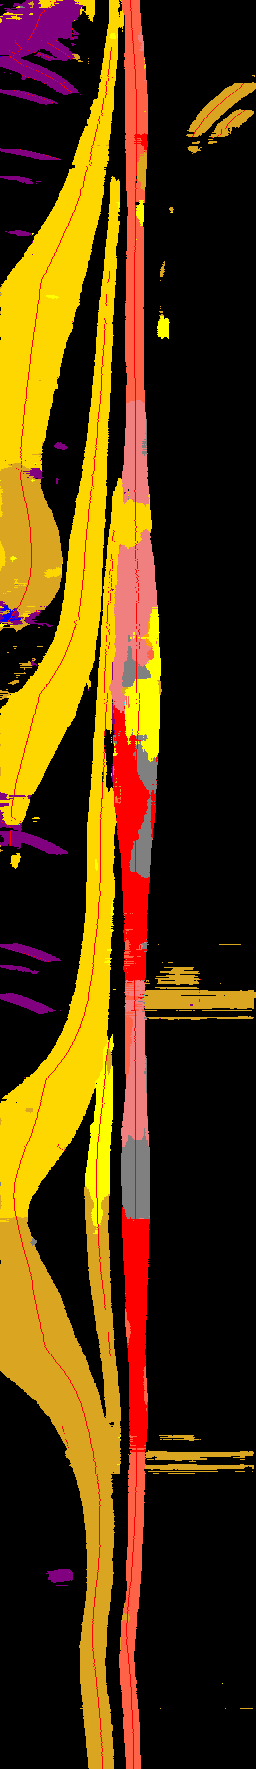

In [6]:
#find truth values that are green
coords = []
if not green_red:
    for i in range(truth.size[0]):
        for j in range(truth.size[1]):
            if truth.getpixel((i,j)) == (0, 255, 0):
                coords.append((i,j))
else:
    # green and red pixels
    for i in range(truth.size[0]):
        for j in range(truth.size[1]):
            if truth.getpixel((i,j)) == (0, 255, 0) or truth.getpixel((i,j)) == (255, 0, 0):
                coords.append((i,j))

#normalize all coords to the dimensions of the smaller image
scale = (pred.size[0]/truth.size[0], pred.size[1]/truth.size[1])
coords = [(int(scale[0]*x), int(scale[1]*y)) for x,y in coords]

#map the coords to the pred image, remove duplicates
for x,y in coords:
    # if the current pixel is not black, color it red
    if pred.getpixel((x,y)) != (0,0,0):
        pred.putpixel((x,y), (255,0,0))
coords = list(set(coords))

pred